Regularization in scikit-learn
Elastic net regression is implemented in scikit-learn using ElasticNet(). Useful parameters are described in the table below. Additional parameters and details can be found in the scikit-learn documentation. Input features should be scaled using StandardScaler() before fitting a model using a regularization method.
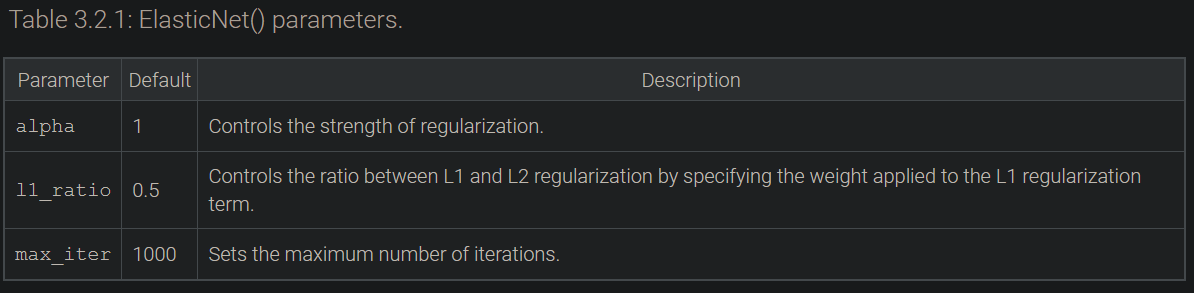
Ridge regression and LASSO are implemented in scikit-learn using Ridge() and Lasso() respectively. Details are available in the Ridge() documentation and Lasso() documentation.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

In [94]:
# Load the dataset
rent_all = pd.read_csv('rent18.csv')

# Keep subset of features, drop missing values
rent = rent_all[['price', 'beds', 'baths', 'sqft']].dropna()
rent.head()

,price,beds,baths,sqft
1,2500,2.0,1.0,1050.0
6,3000,3.0,1.5,1100.0
7,2743,2.0,2.0,1120.0
9,1800,2.0,1.0,650.0
13,2950,2.0,1.0,800.0


Use elastic net regression to predict rental price from square footage

In [95]:
# Define input and output features for a simple linear model predicting price from sqft
X = rent[['sqft']]
y = rent[['price']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [96]:
# Initialize and fit model using elastic net regression
#The parameter alpha controls the strength of the regularization, 
# with alpha=0 being the same as least squares linear regression. 
# The parameter l1_ratio controls the ratio between L1 and L2. 
# When l1_ratio=0, the function becomes a ridge regression function. When l1_ratio=1, the function becomes a LASSO function.
eNet = ElasticNet(alpha=1, l1_ratio=.5)
eNet.fit(X,y)

ElasticNet(alpha=1)

In [97]:
# Estimated intercept weight
eNet.intercept_

array([3169.44695652])

In [98]:
# Estimated weight for sqft
eNet.coef_

array([508.2005562])

Compare elastic net to least squares

In [99]:
# Fit using least squares

linRegModel=LinearRegression()
linRegModel.fit(X,y)

LinearRegression()

In [100]:
linRegModel.intercept_

array([3169.44695652])

In [101]:
linRegModel.coef_

array([[762.8008343]])

In [103]:
eNet.predict([[1.45]])

array([3906.33776301])

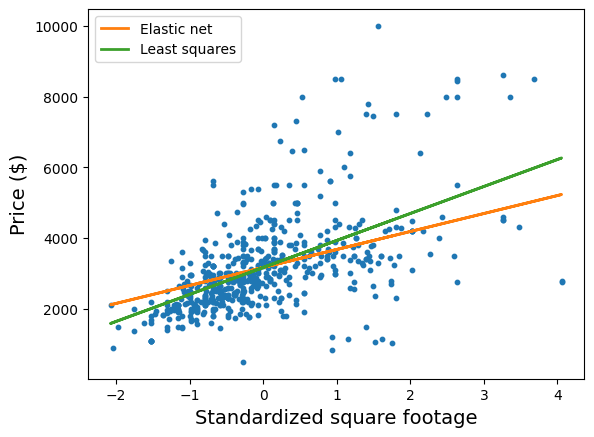

In [ ]:
# Plot the data and both fitted models

# Find predicted values
yPredictedENet = eNet.predict(X)
yPredictedLin = linRegModel.predict(X)

# Plot
plt.scatter(X, y, color='#1f77b4', s=10)
plt.plot(X, yPredictedENet, color='#ff7f0e', linewidth=2, label='Elastic net')
plt.plot(X, yPredictedLin, color='#3ca02c', linewidth=2, label='Least squares')
plt.xlabel('Standardized square footage', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(loc='upper left')
plt.show()

Use elastic net regression to predict rental price from square fottage and number of bedrooms.

In [ ]:
# Define input and output features
X = rent[['sqft', 'beds']]
y = rent[['price']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Initialize and fit elastic net
eNet2 = ElasticNet(alpha=1, l1_ratio=0.75)
eNet2.fit(X,y)

ElasticNet(alpha=1, l1_ratio=0.75)

In [ ]:
# Estimated intercept and weights
print(eNet2.intercept_)
print(eNet2.coef_)

[3169.44695652]
[507.76358204 162.1744312 ]


In [ ]:
eNet2.predict([[1.45, -1.18]])

array([3714.33832167])

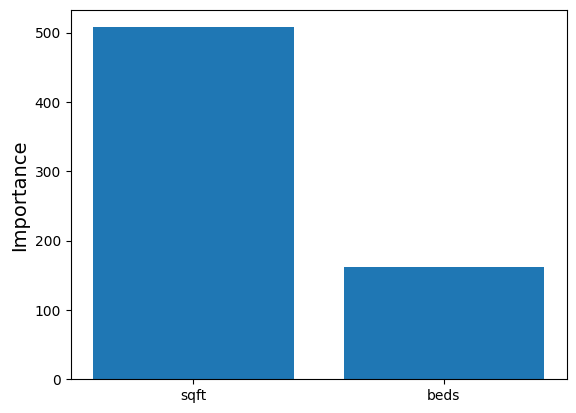

In [ ]:
# Plot the absolute value of the weights
importance = np.abs(eNet2.coef_)
names = np.array(['sqft', 'beds'])
sort = np.argsort(importance)[::-1]
plt.bar(x=names[sort], height=importance[sort])
plt.ylabel('Importance', fontsize=14)
plt.show()

Set $\alpha$ = 1, show weight estimates for different values of the weight applied to the L1 norm, $\lambda$.

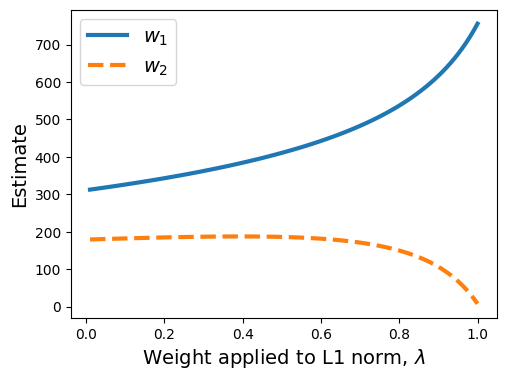

In [ ]:
aVal = 1
l1vals = np.linspace(0.01, 1, 100,)
ENcoef = np.empty([100,3])

for i in range(len(l1vals)):
    EN = ElasticNet(alpha=aVal, l1_ratio=l1vals[i], max_iter=10000)
    EN.fit(X,y)
    ENcoef[i,0]=EN.intercept_[0]
    ENcoef[i,1]=EN.coef_[0]
    ENcoef[i,2]=EN.coef_[1]

# Plot
fig = plt.figure(figsize = (5.5,4))
plt.plot(l1vals, ENcoef[:,1], color='#1f77b4', linestyle='solid', linewidth=3, label=r"$w_1$")
plt.plot(l1vals, ENcoef[:,2], color='#ff7f0e', linestyle='dashed', linewidth=3, label=r"$w_2$")

plt.xlabel(r'Weight applied to L1 norm, $\lambda$', fontsize=14)
plt.ylabel('Estimate', fontsize=14)

plt.legend(loc='upper left', fontsize=14)

plt.show()

Set the weight applied to the L1 norm at $\lambda$ = 0.5, show weight estimates for different values of the regularization strength, $\alpha$.

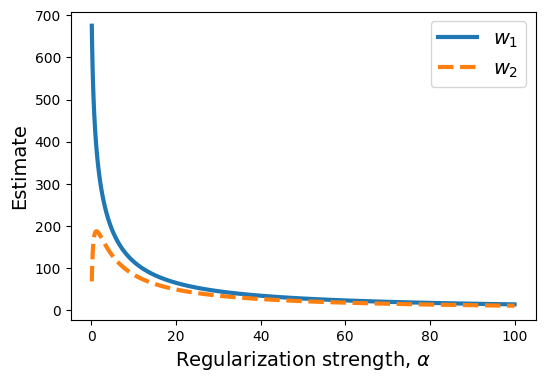

In [ ]:
l1NormWeight = 0.5
alphaVals = np.logspace(-1, 2, 100)
ENcoef = np.empty([100,3])

for i in range(len(ENcoef)):
    EN = ElasticNet(alpha=alphaVals[i], l1_ratio=l1NormWeight, max_iter=2000)
    EN.fit(X,y)
    ENcoef[i,0]=EN.intercept_[0]
    ENcoef[i,1]=EN.coef_[0]
    ENcoef[i,2]=EN.coef_[1]


# Plot
fig = plt.figure(figsize = (6,4))
plt.plot(alphaVals, ENcoef[:,1], color='#1f77b4', linestyle='solid', linewidth=3, label=r"$w_1$")
plt.plot(alphaVals, ENcoef[:,2], color='#ff7f0e', linestyle='dashed', linewidth=3, label=r"$w_2$")


plt.xlabel(r'Regularization strength, $\alpha$', fontsize=14)
plt.ylabel('Estimate', fontsize=14)

plt.legend(loc='upper right', fontsize=14)

plt.show()